# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create a dataframe to hold all the values 
df = pd.DataFrame({'City': [city for city in cities]})
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""

In [4]:
count_sets = 1 
count_records = 0
max_records = 50

In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
        "units": "imperial",
        "appid": api_keys.api_key }
print("Beginning Data Retrieval")
print("-------------------------")

for index, row in df.iterrows():
    city_name = row['City']
    params["q"] = city_name
    out_json = requests.get(base_url,params =params).json()
    print(f"Processing Record {count_records} of Set {count_sets} | {city_name}")
    
    if count_records == max_records:
        time.sleep(0.02)
        count_sets +=1
        count_records = 0
    try: 
        df.loc[index, "Cloudiness"] = out_json["clouds"]["all"]
        df.loc[index, "Country"]= out_json["sys"]["country"]
        df.loc[index, "Date"]=  out_json["dt"]
        df.loc[index, "Humidity"]= out_json["main"]["humidity"]
        df.loc[index, "Lat"]= out_json["coord"]["lat"]
        df.loc[index, "Lng"]= out_json["coord"]["lon"]
        df.loc[index, "Max Temp"]= out_json["main"]["temp_max"]
        df.loc[index, "Wind Speed"]= out_json["wind"]["speed"]
        
    except:
        print("City not found. Skipping...")
    count_records +=1 
print("-------------------------")    
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 0 of Set 1 | port blair
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | chapais
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | morondava
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | vallenar
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | ndago
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | khatanga
Processing Record

Processing Record 32 of Set 4 | boone
Processing Record 33 of Set 4 | griffith
Processing Record 34 of Set 4 | katima mulilo
Processing Record 35 of Set 4 | mujiayingzi
Processing Record 36 of Set 4 | tommot
Processing Record 37 of Set 4 | san patricio
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | ulaanbaatar
Processing Record 40 of Set 4 | jinchang
Processing Record 41 of Set 4 | olafsvik
City not found. Skipping...
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | kizukuri
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | aberdeen
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | lashio
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | severo-kurilsk
Processing

Processing Record 20 of Set 8 | fare
Processing Record 21 of Set 8 | katsuura
Processing Record 22 of Set 8 | redmond
Processing Record 23 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 24 of Set 8 | sinkat
City not found. Skipping...
Processing Record 25 of Set 8 | tilichiki
Processing Record 26 of Set 8 | bargal
City not found. Skipping...
Processing Record 27 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 8 | severo-yeniseyskiy
Processing Record 29 of Set 8 | ceres
Processing Record 30 of Set 8 | hovd
Processing Record 31 of Set 8 | develi
Processing Record 32 of Set 8 | tezu
Processing Record 33 of Set 8 | teya
Processing Record 34 of Set 8 | calama
Processing Record 35 of Set 8 | port augusta
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | chokurdakh
Processing Record 38 of Set 8 | sorong
Processing Record 39 of Set 8 | ambulu
Processing Record 40 of Set 8 | maceio
Processing Record 41 of Set 8 | cabedelo
Processing Recor

Processing Record 6 of Set 12 | nara
Processing Record 7 of Set 12 | saint anthony
Processing Record 8 of Set 12 | nurota
Processing Record 9 of Set 12 | madaoua
Processing Record 10 of Set 12 | nizhnyaya tavda
Processing Record 11 of Set 12 | arrifes
Processing Record 12 of Set 12 | lumby
Processing Record 13 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 14 of Set 12 | watsa
Processing Record 15 of Set 12 | san ramon
Processing Record 16 of Set 12 | anzio
Processing Record 17 of Set 12 | ventspils
Processing Record 18 of Set 12 | gat
Processing Record 19 of Set 12 | kirkwall
Processing Record 20 of Set 12 | talnakh
Processing Record 21 of Set 12 | kahului
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | daugavpils
Processing Record 24 of Set 12 | bela
Processing Record 25 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 26 of Set 12 | bambanglipuro
Processing Record 27 of Set 12 | makiyivka
Processing Record 28 of Set 12 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Export data into csv 
df.to_csv("output_data.csv")
df2 = pd.read_csv("output_data.csv",index_col=0).dropna()
df2.to_csv("output_data.csv")
df2.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [8]:
df2.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port blair,24.0,IN,1.552018e+09,100.0,11.67,92.75,81.04,6.06
1,mataura,0.0,NZ,1.552018e+09,48.0,-46.19,168.86,66.00,1.99
2,lebu,75.0,ET,1.552014e+09,100.0,8.96,38.73,55.40,4.70
3,puerto ayora,0.0,EC,1.552018e+09,99.0,-0.74,-90.35,78.79,12.66
4,cape town,0.0,ZA,1.552018e+09,67.0,-33.93,18.42,62.01,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
year = time.localtime(time.time()).tm_year
month = time.localtime(time.time()).tm_mon
day = time.localtime(time.time()).tm_mday

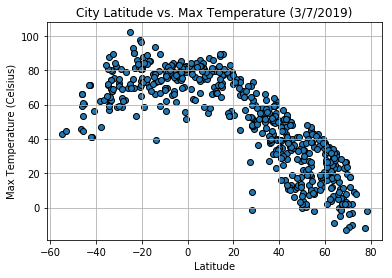

In [10]:
plt.scatter( df2["Lat"], df2["Max Temp"], edgecolors="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title(f"City Latitude vs. Max Temperature ({month}/{day}/{year})")
plt.grid(True)
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

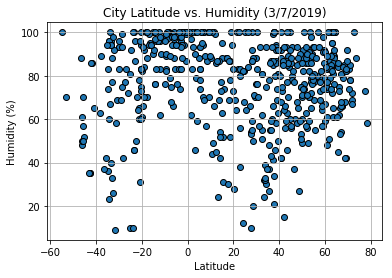

In [11]:
plt.scatter( df2["Lat"], df2["Humidity"], edgecolors="k" )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({month}/{day}/{year})")
plt.grid()
plt.savefig("Lat_vs_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

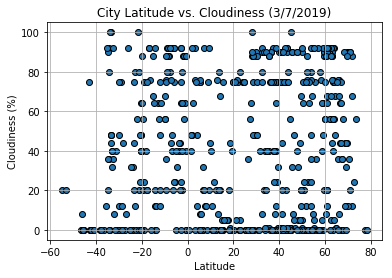

In [12]:
plt.scatter( df2["Lat"],df2["Cloudiness"], edgecolors="k" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({month}/{day}/{year})")
plt.grid()
plt.savefig("Lat_vs_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

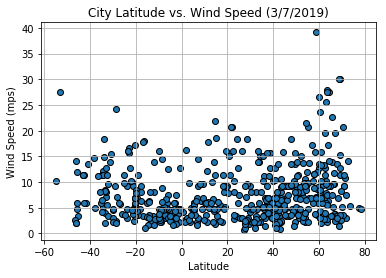

In [13]:
plt.scatter( df2["Lat"], df2["Wind Speed"], edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title(f"City Latitude vs. Wind Speed ({month}/{day}/{year})")
plt.grid()
plt.savefig("Lat_vs_Wind.png")
plt.show()